In [16]:
import warnings
warnings.filterwarnings("ignore") 

In [17]:
import pandas as pd 
df=pd.read_csv('C:\\workplace\\power-consumption\\dataset\\processed.csv',index_col=0)
df.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption
Datetime,,,,,,
2017-01-01 00:00,6.196833,75.066667,0.081833,0.063500,0.098833,22158.923532
2017-01-01 01:00,5.548833,77.583333,0.082000,0.056833,0.112500,19259.508737
2017-01-01 02:00,5.054333,78.933333,0.082333,0.063000,0.129167,17363.293880
2017-01-01 03:00,5.004333,77.083333,0.082833,0.059833,0.141000,16304.815849
2017-01-01 04:00,5.097667,74.050000,0.082333,0.058000,0.122833,15904.879449


In [22]:
train_df=df.iloc[:5000-7]
train_df.reset_index(inplace=True)
train_df.columns=['ds', 'Temperature', 'Humidity', 'WindSpeed',
       'GeneralDiffuseFlows', 'DiffuseFlows', 'y']
train_df['ds']=pd.to_datetime(train_df['ds'])
train_df

,ds,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,y
0,2017-01-01 00:00:00,6.196833,75.066667,0.081833,0.063500,0.098833,22158.923532
1,2017-01-01 01:00:00,5.548833,77.583333,0.082000,0.056833,0.112500,19259.508737
2,2017-01-01 02:00:00,5.054333,78.933333,0.082333,0.063000,0.129167,17363.293880
3,2017-01-01 03:00:00,5.004333,77.083333,0.082833,0.059833,0.141000,16304.815849
4,2017-01-01 04:00:00,5.097667,74.050000,0.082333,0.058000,0.122833,15904.879449
...,...,...,...,...,...,...,...
4988,2017-07-27 20:00:00,27.843333,61.208333,4.906667,13.574167,11.094667,44231.353009
4989,2017-07-27 21:00:00,27.210000,62.086667,4.907500,0.083333,0.085333,42667.595168
4990,2017-07-27 22:00:00,26.566667,71.410000,4.906333,0.089333,0.101167,40407.914353
4991,2017-07-27 23:00:00,25.615000,79.433333,4.904333,0.095000,0.101333,36851.143991


In [37]:
test_df=df.iloc[5000-7:]
test_df.reset_index(inplace=True)
test_df.columns=['ds', 'Temperature', 'Humidity', 'WindSpeed',
       'GeneralDiffuseFlows', 'DiffuseFlows', 'y']
test_df['ds']=pd.to_datetime(test_df['ds'])
test_df

,ds,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,y
0,2017-07-28 01:00:00,27.585000,56.598333,4.908000,0.096833,0.098167,28977.450352
1,2017-07-28 02:00:00,27.398333,55.340000,4.908167,0.100667,0.094333,26477.507331
2,2017-07-28 03:00:00,26.473333,58.330000,4.908000,0.098833,0.100000,25739.260298
3,2017-07-28 04:00:00,25.985000,59.438333,4.907667,0.101167,0.104000,24527.400354
4,2017-07-28 05:00:00,25.066667,61.198333,4.906000,0.098500,0.108667,20630.238959
...,...,...,...,...,...,...,...
3738,2017-12-30 19:00:00,9.453333,62.406667,0.074667,0.052000,0.102000,28979.428115
3739,2017-12-30 20:00:00,9.041667,63.990000,0.080333,0.052667,0.105000,28675.974373
3740,2017-12-30 21:00:00,8.011667,69.675000,0.081500,0.073167,0.098333,27574.986552
3741,2017-12-30 22:00:00,7.598333,70.315000,0.081833,0.058667,0.108167,26028.580802


In [38]:
import prophet 

In [39]:
model=prophet.Prophet(daily_seasonality=True, weekly_seasonality=True)
model.add_regressor('Temperature')
model.add_regressor('Humidity')
model.add_regressor('WindSpeed')
model.add_regressor('GeneralDiffuseFlows')
model.add_regressor('DiffuseFlows')
model.fit(train_df)

14:11:05 - cmdstanpy - INFO - Chain [1] start processing
14:11:06 - cmdstanpy - INFO - Chain [1] done processing


In [35]:
future = model.make_future_dataframe(periods=24,freq='H')
future.tail()

,ds
5012,2017-07-28 20:00:00
5013,2017-07-28 21:00:00
5014,2017-07-28 22:00:00
5015,2017-07-28 23:00:00
5016,2017-07-29 00:00:00


In [42]:
pred=model.predict(test_df)

<Axes: >

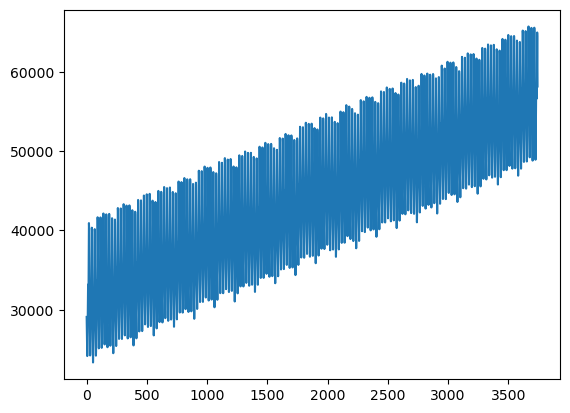

In [44]:
pred['yhat'].plot()

In [46]:
test_df

,ds,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,y
0,2017-07-28 01:00:00,27.585000,56.598333,4.908000,0.096833,0.098167,28977.450352
1,2017-07-28 02:00:00,27.398333,55.340000,4.908167,0.100667,0.094333,26477.507331
2,2017-07-28 03:00:00,26.473333,58.330000,4.908000,0.098833,0.100000,25739.260298
3,2017-07-28 04:00:00,25.985000,59.438333,4.907667,0.101167,0.104000,24527.400354
4,2017-07-28 05:00:00,25.066667,61.198333,4.906000,0.098500,0.108667,20630.238959
...,...,...,...,...,...,...,...
3738,2017-12-30 19:00:00,9.453333,62.406667,0.074667,0.052000,0.102000,28979.428115
3739,2017-12-30 20:00:00,9.041667,63.990000,0.080333,0.052667,0.105000,28675.974373
3740,2017-12-30 21:00:00,8.011667,69.675000,0.081500,0.073167,0.098333,27574.986552
3741,2017-12-30 22:00:00,7.598333,70.315000,0.081833,0.058667,0.108167,26028.580802
